In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('encounters.csv', parse_dates=['STOP'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id_x,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.0,36971009.0,Sinusitis (disorder)
1,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.0,NaN,NaN
2,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.0,444814009.0,Viral sinusitis (disorder)
3,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.0,NaN,NaN
4,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.0,NaN,NaN


In [3]:
dt_stop = df_al['STOP'].dropna()
dt_stop = dt_stop.unique()
dt_stop

<DatetimeArray>
['2001-05-01 15:17:18+00:00', '2011-07-28 15:17:18+00:00',
 '2011-12-08 15:17:18+00:00', '2014-07-31 15:17:18+00:00',
 '2017-08-03 15:32:18+00:00', '2019-03-20 15:17:18+00:00',
 '2010-01-23 18:10:28+00:00', '2012-01-23 18:00:28+00:00',
 '2015-01-26 18:15:28+00:00', '2016-12-29 18:00:28+00:00',
 ...
 '2011-05-28 17:42:52+00:00', '2012-04-23 17:42:52+00:00',
 '2012-06-02 17:42:52+00:00', '2013-06-08 17:57:52+00:00',
 '2014-06-14 17:42:52+00:00', '2015-06-20 17:57:52+00:00',
 '2016-06-25 17:42:52+00:00', '2017-07-01 17:57:52+00:00',
 '2018-07-07 17:42:52+00:00', '2019-07-13 17:57:52+00:00']
Length: 52461, dtype: datetime64[ns, UTC]

In [4]:
df_al['STOP'] = df_al['STOP'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['STOP'] = df_al['STOP'].replace({pd.NaT: "0"})
df_al['STOP']

0        1
1        1
2        1
3        1
4        1
        ..
53341    1
53342    1
53343    1
53344    1
53345    1
Name: STOP, Length: 53346, dtype: int64

In [5]:
contigency = pd.crosstab(df_al['STOP'], df_al['DESCRIPTION'])
contigency

DESCRIPTION,Admission to surgical department,Admission to thoracic surgery department,Allergic disorder follow-up assessment,Allergic disorder initial assessment,Asthma follow-up,Cardiac Arrest,Consultation for treatment,Death Certification,Discussion about treatment (procedure),Domiciliary or rest home patient evaluation and management,...,Postoperative follow-up visit (procedure),Prenatal initial visit,Prenatal visit,Screening surveillance (regime/therapy),Stroke,Telemedicine consultation with patient,Telephone encounter (procedure),Urgent care clinic (procedure),Well child visit (procedure),posttraumatic stress disorder
STOP,,,,,,,,,,,,,,,,,,,,,
1,41,3,24,42,284,48,1309,16,11,83,...,254,801,2676,135,51,315,1,2373,4144,4


<AxesSubplot:xlabel='DESCRIPTION', ylabel='STOP'>

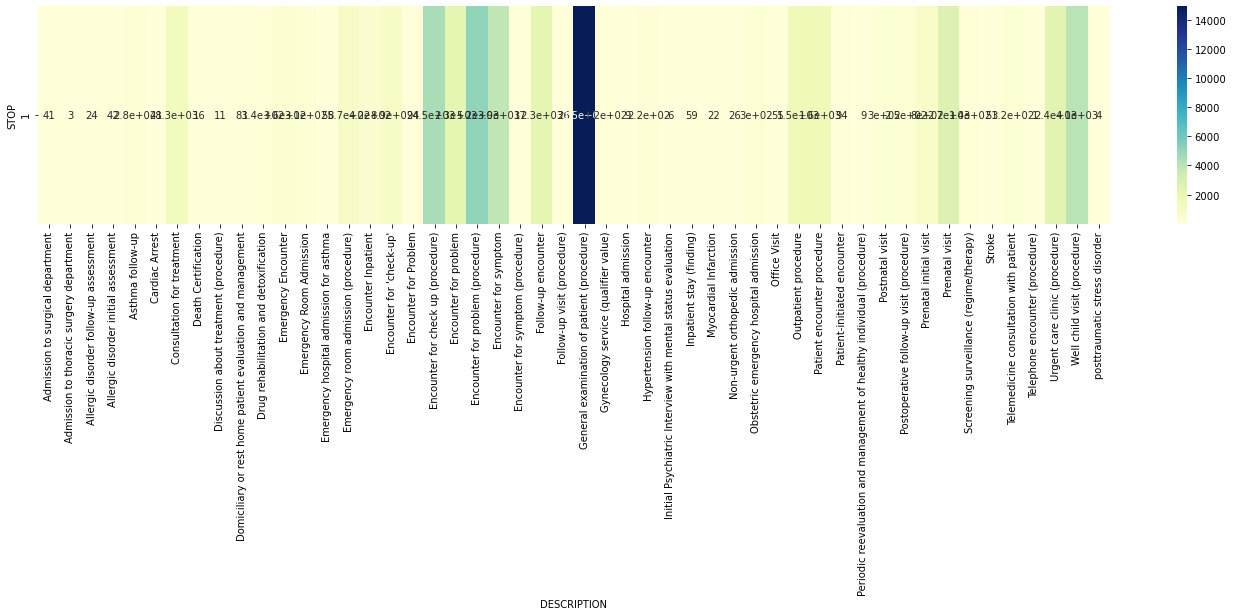

In [6]:
plt.figure(figsize=(24,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

1.0

In [8]:
features_column = ['RACE', 'ETHNICITY', 'GENDER', 'DESCRIPTION']
label_column = ['STOP']

In [9]:
dataset = df_al[features_column + label_column]
dataset['STOP'] = dataset['STOP'].astype('int32')

#reference for numerical categories
categorical_dict = {}

#convert categorical data into numerical data
for feature_name in features_column:
    dataset[feature_name] = dataset[feature_name].astype('category')
    categorical_dict.update({feature_name: dataset[feature_name].cat.categories})
    dataset[feature_name] = dataset[feature_name].astype('category').cat.codes
    
print(categorical_dict)

{'RACE': Index(['asian', 'black', 'native', 'other', 'white'], dtype='object'), 'ETHNICITY': Index(['hispanic', 'nonhispanic'], dtype='object'), 'GENDER': Index(['F', 'M'], dtype='object'), 'DESCRIPTION': Index(['Admission to surgical department',
       'Admission to thoracic surgery department',
       'Allergic disorder follow-up assessment',
       'Allergic disorder initial assessment', 'Asthma follow-up',
       'Cardiac Arrest', 'Consultation for treatment', 'Death Certification',
       'Discussion about treatment (procedure)',
       'Domiciliary or rest home patient evaluation and management',
       'Drug rehabilitation and detoxification', 'Emergency Encounter',
       'Emergency Room Admission', 'Emergency hospital admission for asthma',
       'Emergency room admission (procedure)', 'Encounter Inpatient',
       'Encounter for 'check-up'', 'Encounter for Problem',
       'Encounter for check up (procedure)', 'Encounter for problem',
       'Encounter for problem (procedur

<ipython-input-9-452f4aa08d9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['STOP'] = dataset['STOP'].astype('int32')
<ipython-input-9-452f4aa08d9e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature_name] = dataset[feature_name].astype('category')
<ipython-input-9-452f4aa08d9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('STOP')
test_labels = test_features.pop('STOP')

In [12]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(len(features_column)),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error', metrics = ['accuracy'],
                optimizer = 'adam')
  return model

In [13]:
model = build_and_compile_model()

In [14]:
#fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            mode='min')
history = model.fit(
    train_features[features_column],
    train_labels,
    validation_split=0.2,
    callbacks=early_stopping,
    verbose=1, epochs=100)

Epoch 1/100
1067/1067 [==============================] - 1s 689us/step - loss: 0.0606 - accuracy: 0.9961 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 2/100
1067/1067 [==============================] - 1s 591us/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 3/100
1067/1067 [==============================] - 1s 594us/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 4/100
1067/1067 [==============================] - 1s 575us/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 5/100
1067/1067 [==============================] - 1s 569us/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000


In [15]:
model.evaluate(test_features[features_column], test_labels)

334/334 [==============================] - 0s 376us/step - loss: 0.0177 - accuracy: 1.0000


[0.017682326957583427, 1.0]

In [16]:
model.save('model_encounters')

INFO:tensorflow:Assets written to: model_encounters\assets
